# Mini project on implementation of machine learning methods

## How to work on the project
To work on your project you need to open the `Practical_work.ipynb` file through Jupyter notebook or your editor of choice.
A separate `PDF` file contains the script that you need to follow with snippets of code that you will need to add to your notebook.
There are segements where you need to create your own code, or add your own comments. These are all indicated with the note **ToDo**.
For some of the tasks, you may need to revisit the lecture notes to check some of the code examples that were presented there.


# Description
In this project you will work with a dataset holding information about potential bank clients seeking to get a loan.
The dataset holds information about their employment, family, age, and financial state. The purpose is to use this information to explore the potential risk of an individual to default on a loan. In the dataset this is reflected on the feature `debt` which indicates if a person has defaulted in the payments of a loan.

## Description of the features in the dataset
- children: the number of children in the family 
- days_employed: how long the customer has worked 
- dob_years: the customer’s age 
- education: the customer’s education level 
- education_id: identifier for the customer’s education 
- family_status: the customer’s marital status 
- family_status_id: identifier for the customer’s marital status 
- gender: the customer’s gender 
- income_type: the customer’s income type 
- debt: whether the client has ever defaulted on a loan 
- total_income: annual income 
- purpose: reason for taking out a loan written by the client
- purpose-short: processed fixed text representing the purpose for the loan

## Objective
The dataset is not cleaned. As part of this assignment you will need to clean your dataset and prepare it for further data analysis.

.

### Loading libraries

In [60]:
# Add code from script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploring the dataset
Read the dataset from the csv file.

In [61]:
# Add code from script
df = pd.read_csv("./datasets/credit_scoring_pre.csv")
pd.set_option('display.float_format', '{:.0f}'.format)

#### ToDo

Explore your dataset. Use the functions __[head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)__, __[info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)__, and __[describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)__ on the dataframe and see their outputs.

In [62]:
# ToDo: Check head
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
0,1,-8438,42,masters degree,0,married,0,F,employee,0,253876,purchase of the house,house
1,1,-4025,36,secondary education,1,married,0,F,employee,0,112080,car purchase,car
2,0,-5623,33,Secondary Education,1,married,0,M,employee,0,145886,purchase of the house,house
3,3,-4125,32,secondary education,1,married,0,M,employee,0,267629,supplementary education,education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,158616,to have a wedding,wedding


In [63]:
# ToDo: Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
 12  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


In [64]:
# ToDo: Check describe
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525,19351,21525,21525,21525,21525,19351
mean,1,63046,43,1,1,0,167422
std,1,140827,13,1,1,0,102972
min,-1,-18389,0,0,0,0,20667
25%,0,-2747,33,1,0,0,103053
50%,0,-1203,42,1,0,0,145018
75%,1,-291,53,1,1,0,203435
max,20,401755,75,4,4,1,2265604


### Question
What do you notice about your dataset?

Are there any missing values?

Are the value ranges as expected? Do you see any attributes having abnormally high or low values?

Do you see any features that may require transformations in order for the dataset to be ready for training a ML model?

Are there any redundand features?

In [65]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
purpose_short          0
dtype: int64

In [66]:
df['children'].value_counts()

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

In [67]:
df['dob_years'].value_counts().sort_index()

dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: count, dtype: int64

In [68]:
df['total_income'].describe()

count     19351
mean     167422
std      102972
min       20667
25%      103053
50%      145018
75%      203435
max     2265604
Name: total_income, dtype: float64

In [69]:
(df['days_employed'] < 0).sum()

np.int64(15906)

### ToDo: write your observations
- What I notice about my dataset is that it is very messy. It has negative values for days_employed hence pandas dont count it as missing but they are technically still wrong. There are 15906 rows with negative values as seen by my code above.
- Moreover, if you take a look at the excel file, two columns have missing values which are days_employed and total_income.
- If you look at the code above, I have gone through every column in the excel sheet with a number where there is a possisbility of columumns and rows having abnormally high and low values. One that stood out was 20 in the children's column as we did a value count. Moreover, similary for dob_years there was 101 count for the age 0 which doesn't make sense at all.
- Also if you look for redundant features, there are 4 columns that basically give you the same information as they are given a certain value to it. In the same way that education and education_id duplicate each other, the columns family_status and family_status_id also form a one to one mapping, meaning the ID is just a coded version of the text and doesn’t provide any additional insight.
- I feel the dataset should be cleaned and transformed as in some columns should be removed so it helps the machine learning model train better. Like the purpose column can be removed and just keep the purpose_short column. Likewise we can remove the education ids and family ids columns and then use label encoding to match the text.

### Negative values

Some values appear to be negative. We can assume that this was probably a data entry error.

We can replace them with positive values.

You need to create a function called `change_to_positive` which takes a single parameter. The fuction will just return the absolute value of the parameter, i.e. `abs(value)`, where `value` is the name of the parameter.

In [70]:
# ToDo: write function
def change_to_positive(value):
    return abs(value)

Now we can apply this function to all the items in the feature `children` and replace their existing value.

In [71]:
# Add code from script
df['children'] = df['children'].apply(change_to_positive)

In [72]:
# ToDo: Is there any other feature you need to correct?
# Apply the same function to any feature that has negative values
df['days_employed'] = df['days_employed'].apply(change_to_positive)

Check your dataset to ensure negative values are fixed.

In [73]:
# ToDo use the appropriate function to quickly check your dataset for negative values
df.select_dtypes(include=['int64', 'float64']).lt(0).any()

# did not use object values as they are text. looked at only the numeric values in the dataset

children            False
days_employed       False
dob_years           False
education_id        False
family_status_id    False
debt                False
total_income        False
dtype: bool

In [74]:
(df['days_employed'] < 0).sum()

# checked day_employed as it had 15000+ rows of negative values. There are no negative values anymore.

np.int64(0)

## Processing duplicates

The features with categorical data may contain duplicate values. We can get a quick view of all the values in a feature using the __[unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)__ function. First we can text the values of the field 'family_status':

In [75]:
# Add code from script
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

They seem fine. All are unique values.

Now try the 'education' feature. What do you observe?

In [76]:
# ToDo: check duplicate values on the 'education' feature
df['education'].unique()

array(['masters degree', 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', 'MASTERS DEGREE', 'bachelor degree',
       'primary education', 'Masters Degree', 'BACHELOR DEGREE',
       'Bachelor Degree', 'PRIMARY EDUCATION', 'Primary Education',
       'Academic Degree', 'ACADEMIC DEGREE', 'academic degree'],
      dtype=object)

Differences in the capitalisation of the words have created duplicate values. We need to fix this.

You need to create a function called `to_lower_value` which takes a single parameter. The fuction will just return the parameter converted to lower case, i.e. `value.lower()`

In [77]:
# ToDo: write function
def to_lower_value(value):
    return value.lower()

Now we can apply this function to all the items in the feature 'education' and replace the existing values:

In [78]:
# Add code from script
df['education']= df['education'].apply(to_lower_value)

Check again the values of the feature 'education'

In [79]:
# ToDo: check duplicates for 'education'
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education', 'academic degree'], dtype=object)

### Feature 'purpose'

Check the duplicate values for both the features 'purpose' and 'purpose_short'. What do you observe?

Do you need both features in your dataset?

In [80]:
# ToDo: check duplicates for puprose
df['purpose'].unique()

# if you loook at the output of the feature 'purpose', it has many messy, inconsistent and overlapping descriptions which can be bad for the machine learning model to train on

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car',
       'transactions with the residential real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get asupplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'property renovat

In [81]:
# ToDo: check duplicates for purpose_short
df['purpose_short'].unique()

array(['house', 'car', 'education', 'wedding', 'estate', 'property'],
      dtype=object)

If you need to remove one of the features you can use the Pandas method __[drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)__, i.e. `df.drop("column_name", axis=1)`

In [82]:
# ToDo: drop redundand feature
df = df.drop("purpose", axis=1)

### Check all other categorical values for duplicates

Insert more coding blocks if necessary, using the buttons on the right.

In [83]:
#ToDo check for duplicates
for duplicates in ['family_status', 'gender', 'income_type']:
    print(duplicates, df[duplicates].unique())

family_status ['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
gender ['F' 'M' 'XNA']
income_type ['employee' 'retiree' 'partner' 'civil servant' 'unempoyed' 'entrepreneur'
 'student' 'paternity / maternity leave']


In [84]:
# the other columns also do not have duplicate values like purpose_short hence they can be used for the machine learning model training as it will be easier and cleaner.

### Check point
Now all your values should be free from any duplicates.

## Processing missing values

You may have observed that some fields have null values. Hint: you can see this when you inspect the output of the `info()` function.

First we can extract all the samples that contain at least one null value.


In [85]:
# Add code from script
null_fields=df[df.isnull().any(axis=1)]

*Explanation* 

The method `df.isnull()` returns for every field the value True/False if that field has a null value.

The method `.any(axis=1)` returns True for every row if at least one of the values in that row is 'True'. By chaining the two functions we produce a list with data frames with the value True/False to indicate if that frame has a null value.

The `df[...]` supports selections of items based on a boolean expression. In this case we select only the frames that have a null value.

In [86]:
# Add code from script
null_fields.shape

(2174, 12)

### ToDo
Go to your observations at the start and check the size of your dataset and how many missing values you have for each field.
- Dataset size: **add value**
- Missing values days_employed: **add value**
- Missing values total_income: **add value**


The `null_fields` dataframe seems to hold the same size of items as the number of missing values for each feature. That indicates that every frame that has a missing value for `days_employed` also holds a missing value for `total_income`.
That could initially indicate that maybe these frames represent unemployed people. We need to verify this.

In [87]:
# ToDo: check all the unique values for 'income_type' in the null_fields dataframe
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose_short          0
dtype: int64

In [88]:
null_fields['income_type'].unique()

array(['retiree', 'civil servant', 'partner', 'employee', 'entrepreneur'],
      dtype=object)

It appears that the missing values are not related to employment type.

It is likely that the values are missing because clients opted out from suplying such information.

The best approach would be to replace these null values with representative values from similar clients. I good approach would to see what is the median value for people with the same education level and income type, and asign these values for the missing values.

First we will filter all entries in our dataset for a given education level and income type. We use the `[<expression>]` selector, using a logical expression to filter specific records.

In [89]:
# Example: selecting all records with 'secondary education' and income 'employee'
find_median_data = df[ (df['education']=='secondary education') & (df['income_type']=='employee') ].copy()

# Print median values
find_median_data['days_employed'].median()

1613.581419770452

### ToDo Write a function

Using the code above as the example, write a function called `find_median` which should take two parameters `education` and `income`.
The function should extract the list of matching records for the specified education and income.
Then assign the median for `days_employed` to a variable `median_days`, and the median for `total_income` to a variable `median_income`.
The values should be returned as a list (the return line is provided).


In [90]:
# ToDo: complete the function
def find_median(education, income):
    educationfeature_matching = df['education'] == education
    incomefeature_matching = df['income_type'] == income
    condition = df[educationfeature_matching & incomefeature_matching]
    median_days = condition['days_employed'].agg('median')
    median_income = condition['total_income'].agg('median')
    return [median_days, median_income]

# Test your function
find_median('secondary education', 'employee')

[1613.581419770452, 136555.10882100096]

Now we can write a for-loop to go through the records and replace the relevant values.

In [91]:
# Add code from script
for i in df[df.isnull().any(axis=1)].index:
 median_result = find_median(df.loc[i,'education'], df.loc[i,'income_type'])
 df.loc[i,'days_employed'] = median_result[0]
 df.loc[i,'total_income'] = median_result[1]

*Explanation*

- `df[df.isnull().any(axis=1)].index` generates a list with all the frame ids that contain a null value.
- `df.loc[i,'total_income']` set the value for a combination of row-col values.


### Check point

Check your progress. Use `info` function to look at your dataset. You should now have no null values.

In [92]:
# ToDo check your dataset
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose_short       0
dtype: int64

## Fixing data types

Some fields appear to have numerical values set as floats, but their value should be integer. Specifically `days_employed` and `total_income` should be integers.
We can quickly change those data types.

### ToDo
Write a function called `data_type_int` that takes one parameter. The function should return the parameter after converting it to an integer using the function `int(value)`.

In [93]:
# ToDo: write function
def data_type_int(value):
    return int(value)

We can apply the function to the fields we want to convert.

In [94]:
# Add code from script
df['days_employed'] = df['days_employed'].apply(data_type_int)

In [95]:
# ToDo: apply to total_income
df['total_income'] = df['total_income'].apply(data_type_int)

In [96]:
# Check your dataset with a random sample of records.
# If you run this cell again a different you can check a different random sample.
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
7918,0,416,32,secondary education,1,married,0,F,employee,0,105538,education
6072,0,373147,62,secondary education,1,civil partnership,1,F,retiree,0,136593,education
16734,0,397961,58,secondary education,1,civil partnership,1,F,retiree,0,111080,wedding
13149,0,1350,24,bachelor degree,2,unmarried,4,F,employee,0,134925,education
11448,0,714,34,secondary education,1,unmarried,4,M,partner,1,69511,property
10947,1,2350,41,secondary education,1,married,0,M,civil servant,0,126036,estate
12849,1,1718,33,secondary education,1,married,0,F,partner,0,169124,estate
10048,0,8876,43,masters degree,0,married,0,F,employee,0,191108,education
18146,0,2898,52,secondary education,1,married,0,F,partner,0,126603,house
14724,0,340267,65,secondary education,1,married,0,M,retiree,0,289755,property


## Values that are unlikely to be correct

We need to check for certain values that do not appear correct. You may have noticed some odd values in the field `children`.

First check the range of values in that field using `unique()`

In [97]:
# ToDo: check values for field children
df['children'].unique()

array([ 1,  0,  3,  2,  4, 20,  5])

The value `20` doesn't seem right. It might be a case of miss-typed input and the intended value was `2`.

Before thinking of an approach to fix this, we can first check to see how significant the problem is.

We can count all the records crouped by the values of `children`.

In [98]:
# Add code from script
df['children'].value_counts()

children
0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: count, dtype: int64

For a dataset of 21,000 samples, this looks like a very small subset. It might be easier to remove those records.

To do this you will need to *select* only the records where the value children is not 20. Code for this would be:
`df = df[ df['children']!=20 ]`

Alternative you can replace the values with the number `2`. Code for this would be: `df['children'] = df['children'].replace(20, 2)`

In [99]:
#ToDo fix the problem with the value 20 for children
df['children'] = df['children'].replace(20, 2)


#ToDo then check again the value counts for the feature children
df['children'].value_counts()

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: count, dtype: int64

### ToDo
The field `dob_years` represents the age of a client. Follow a similar approach to see if there are any unusual values in this field. Then try to see how many, and if the number is small you can drop them. Your steps can be to 
1. check unique values
2. count values
3. apply a solution (drop values or replace them)

In [100]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [101]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df['dob_years'].value_counts()

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

In [102]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df = df[df['dob_years'] > 0]
# remove the age of 0

In [103]:
df['dob_years'].value_counts()

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

### ToDo

When checking for unique values for the *education* degree you may have noticed the value "academic degree" which seems a bit odd, when there are other values for batchelor and master degrees.

Follow a similar approach to find out how extensive is the use of this value and see if it would be appropriate to drop it, or perhaps re-assign it to 'batchelor degree'.

In [104]:
# ToDo check unique values for education
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education', 'academic degree'], dtype=object)

In [105]:
# ToDo check the value counts
df['education'].value_counts()


# as you can see there are 6 values of academic degree which need to be converted into a bachelors degree

education
secondary education    15169
masters degree          5225
bachelor degree          742
primary education        282
academic degree            6
Name: count, dtype: int64

In [106]:
# ToDo fix the problem with the academic_degree value
df['education'] = df['education'].replace('academic degree', 'bachelor degree')

In [107]:
# ToDo check your unique values for education to confirm the fix worked
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education'], dtype=object)

The fields `education` and `education_id` seem to represent the same thing. However the ids that are assigned for each education category may not reflect the inherent ranking that is represented by the education level of the client.
It would be better if we replace it with our own values, where the numbers represent the ranking.

In [108]:
mapping = {
    'primary education': 1,
    'secondary education': 2,
    'bachelor degree': 3,
    'masters degree': 4}

df['education_id'] = pd.DataFrame([ mapping[e] for e in df['education']], index=df.index, columns=['education_n'])

*Explanation*

`mapping` is a python dictionarry, that associates keys to values.

We use a python **comprehension** to perform the mapping for each item in the `education` column.\
The expression `[ mapping[e] for e in df['education']]` specifies that for every item (we name it `e`) in the `df['education']` list we select the value from the dictionarry `mapping`. The *comprehension* returns a list of items after they were transformed.

The statement `pd.DataFrame` creates a new pandas dataframe using that list, and we add attributes to specify the index and column name for this dataframe.

### ToDo

Check the values of the `gender` feature.

In [109]:
#ToDo check values
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [110]:
#ToDo check counts
df['gender'].value_counts()

gender
F      14164
M       7259
XNA        1
Name: count, dtype: int64

In [111]:
#ToDo apply solution to remove the values that are wrong
df = df[df['gender'] != 'XNA']

In [112]:
df['gender'].value_counts() # just to check if the code works or not

gender
F    14164
M     7259
Name: count, dtype: int64

### Check point
Print a sample of your dataset and check their basic statistics using `describe`.

In [113]:
#ToDo print sample
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
16519,1,1670,28,secondary education,2,married,0,M,partner,0,159070,car
15250,0,394848,53,secondary education,2,civil partnership,1,F,retiree,1,103720,car
11923,0,3493,52,secondary education,2,civil partnership,1,F,employee,0,244355,wedding
1406,0,388108,55,secondary education,2,married,0,F,retiree,0,88152,estate
2012,1,379811,57,secondary education,2,widow / widower,2,F,retiree,0,228300,car
7773,2,6749,44,secondary education,2,married,0,M,employee,0,98798,house
4962,0,367766,55,secondary education,2,civil partnership,1,F,retiree,0,92764,wedding
19078,1,2357,32,masters degree,4,married,0,F,employee,0,96037,house
12042,0,1197,26,bachelor degree,3,married,0,M,employee,0,151308,education
7133,0,360995,63,secondary education,2,married,0,M,retiree,0,112192,car


In [114]:
#ToDo describe
df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
count,21423,21423,21423,21423,21423,21423,21423,21423,21423,21423,21423,21423
unique,NaN,NaN,NaN,4,NaN,5,NaN,2,8,NaN,NaN,6
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,estate
freq,NaN,NaN,NaN,15169,NaN,12331,NaN,14164,11064,NaN,NaN,4460
mean,0,67273,43,NaN,3,NaN,1,NaN,NaN,0,165392,NaN
std,1,139381,12,NaN,1,NaN,1,NaN,NaN,0,98261,NaN
min,0,24,19,NaN,1,NaN,0,NaN,NaN,0,20667,NaN
25%,0,1023,33,NaN,2,NaN,0,NaN,NaN,0,107778,NaN
50%,0,1992,43,NaN,2,NaN,0,NaN,NaN,0,143493,NaN
75%,1,5348,53,NaN,3,NaN,1,NaN,NaN,0,198114,NaN


# Descriptive statistics

The dataset is now clean, with all the errors corrected.

We can look at some high level statistics to see the quality of the data we have in our set.

**ToDo**: Look at the lecture notes and print the feature statistics histogram. This will only show results for numerical values.

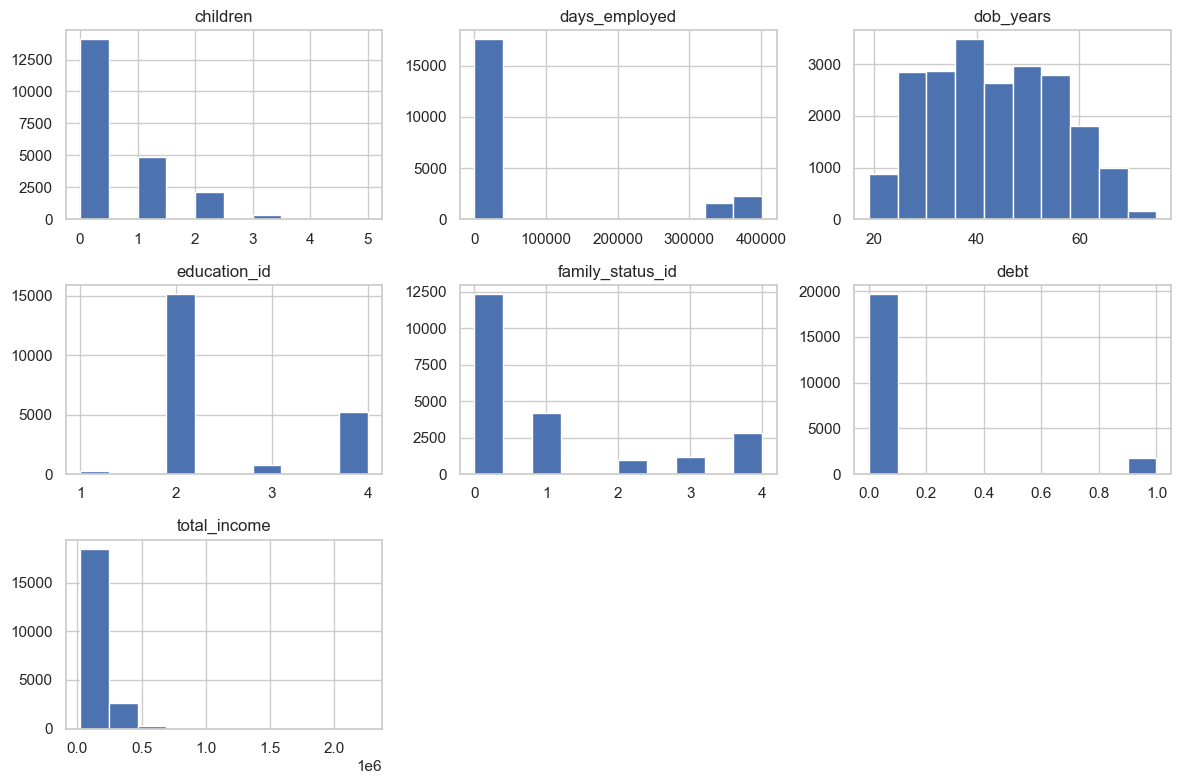

In [115]:
import matplotlib.pyplot as plt
#ToDo plot the feature statistics histogram
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

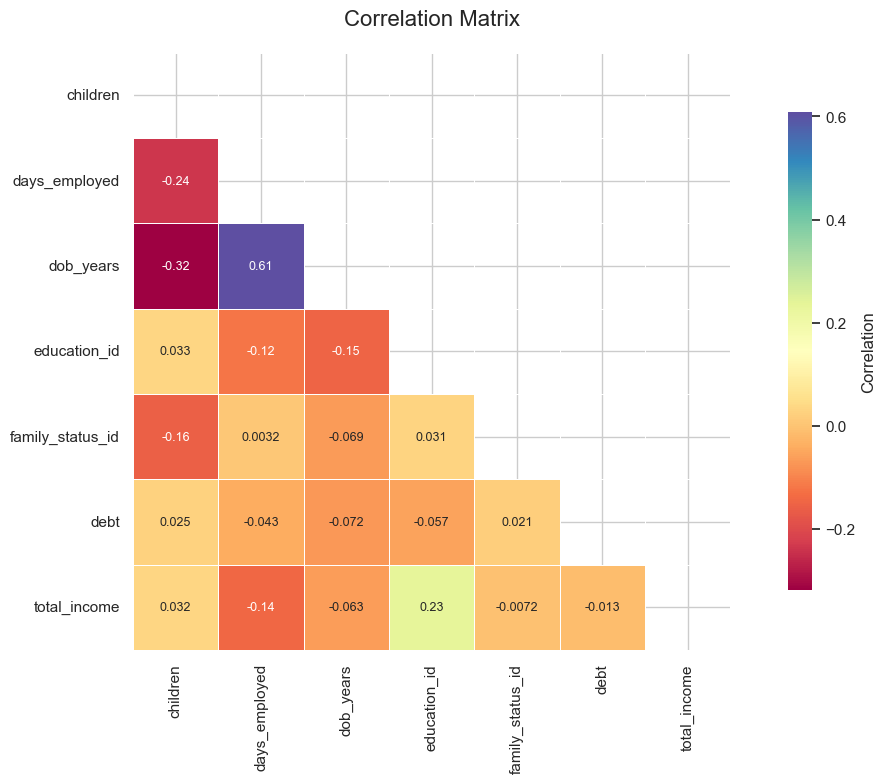

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

numeric_df = df.select_dtypes(include=['int64','float64']) # we select only numerical values for the matrix
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,mask=mask,cmap="Spectral",annot=True,annot_kws={"size": 9},linewidths=0.6,linecolor="white",square=True,cbar_kws={"shrink": 0.8, "label": "Correlation"},
)

plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Your conclusions

Look at the correlation results and the histograms.

- If you are to build a classifier that tries to predict the liklyhood of someone defaulting on their dept (this is indicated by the `debpt` label) do you think you will be able to do it with this dataset? Explain why and indicate which features are likely to help or not help with this process.

Answer: **write answer**

- If you have a chance to extend your dataset with more data, what would be the type of data that you would like to get to improve the quality of your classifier?

Answer: **write answer**


In [ ]:
#q1 
#Based on the correlation results and the histograms, I think it is possible to build a classifier to predict 
#whether a person will default on their debt, but the model will probably have limited or very low accuracy. 
#This is because all the correlation values with the debt label are very low.
#The highest correlation is with dob_years (0.072), which is still a weak relationship. 
#The rest of the features, such as education, gender, income type, days employed, and total income, all have correlations close to zero.
#This shows that none of the features have a strong direct relationship with default on their own. 
#From the histograms, many of the distributions between people who defaulted and those who did not also overlap a lot, 
#which makes the classification problem harder. Because of this overlap and weak correlations, the model will likely struggle to clearly separate the two classes.
#The features that are most likely to help, even if only a little, are:
#Age (dob_years) as it has the highest correlation.
#Education and income type because they can be linked to financial stability.
#Days employed because it reflects job stability and it could help us categorise people into clusters if possible in terms of stages of stability.
#The features that are least helpful are:
#Total income because its correlation is extremely small (0.013).
#Children and family status since they show very weak relationships with default.
#Purpose of the loan which also has low correlation.
#Overall, the dataset does contain some useful information, but since all correlations are weak, 
#    the classifier will likely have moderate or low performance, and more informative features would be needed for better predictions.

#q2
#If I had the chance to extend the dataset, I would mainly add more quantitative financial factors,
#since numerical data is easier for a model to learn from and usually gives better predictions. 
#Examples of this would include credit score, number of past late payments, number of previous defaults, monthly expenses, 
#any existing loans they may have, and the number of years of credit history. These types of variables directly describe a person’s financial behavior and risk level, 
#and adding them would strongly improve the accuracy and reliability of the classifier.

